In [13]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from model_utils import load_dataset, run_experiment, print_results, plot_residuals

In [2]:
dataset = load_dataset()

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [01:09<00:00,  3.01s/it]


In [3]:
for test_score in ['sat_math', 'sat_ebrw']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)
    
for test_score in ['math_4', 'math_8', 'reading_4', 'reading_8']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)

<a id='models'></a>


# DECISION TREE REGRESSION MODELS

Average the entire year of data for each district. Same model is used for all states.

This yields only ~173 rows, so we use k-fold Cross Validation to measure model performance. _Note that the folds are constructed to ensure that all data from a given state is in either the test or train split._

All models use engagement data (split by product type), locale type data, and broadband data, but not the socioeconomic data due to missing data issues that would reduce the size of the dataset.

### 4th and 8th Grade Test Score (& Change) Trees

Each baseline trains 4 decision tree models, one for each combination of 4th & 8th grade, math & reading test scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Model 1a___: Predict raw test scores. ([Model](#model1a_model) / [Results](#model1a_results))
- ___Model 1b___: Predict change in test scores. ([Model](#model1b_model) / [Results](#model1b_results))
- ___Model 2a___: Predict raw test scores from locale data only (i.e., data used by best baseline model). ([Model](#model2a_model) / [Results](#model2a_results))
- ___Model 2b___: Predict change in test scores from engagement and locale data only (i.e., data used by best baseline models). ([Model](#model2b_model) / [Results](#model2b_results))

### SAT Score (& Change) Models

Each baseline trains 2 decision tree models, one for math and one for reading SAT scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Model 1c___: Predict raw test scores. ([Model](#model1c_model) / [Results](#model1c_results))
- ___Model 1d___: Predict change in test scores. ([Model](#model1d_model) / [Results](#model1d_results))
- ___Model 2c___: Predict raw test scores from engagement data only (i.e., data used by best baseline model). ([Model](#model2c_model) / [Results](#model2c_results))
- ___Model 2d___: Predict change in test scores from broadband data only (i.e., data used by best baseline model). ([Model](#model2d_model) / [Results](#model2d_results))

<a id='model1a_model'></a>

## Model 1a: Predict 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [14]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_2022', 
           'testscores;math_8_2022', 
           'testscores;reading_4_2022', 
           'testscores;reading_8_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;math_4_2022 has 174 samples after filtering
Dataset for testscores;math_8_2022 has 173 samples after filtering
Dataset for testscores;reading_4_2022 has 174 samples after filtering
Dataset for testscores;reading_8_2022 has 173 samples after filtering


<a id='model1a_results'></a>

### Model 1a Testing Results

[(Back to top)](#models)

In [15]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_2022
test_r2,-1.0986
test_root_mean_squared_error,9.5305


testscores;math_4_2022: 9.5305


,testscores;math_8_2022
test_r2,-1.9914
test_root_mean_squared_error,9.4420


testscores;math_8_2022: 9.442


,testscores;reading_4_2022
test_r2,-1.4186
test_root_mean_squared_error,10.4556


testscores;reading_4_2022: 10.4556


,testscores;reading_8_2022
test_r2,-1.9073
test_root_mean_squared_error,7.8790


testscores;reading_8_2022: 7.879


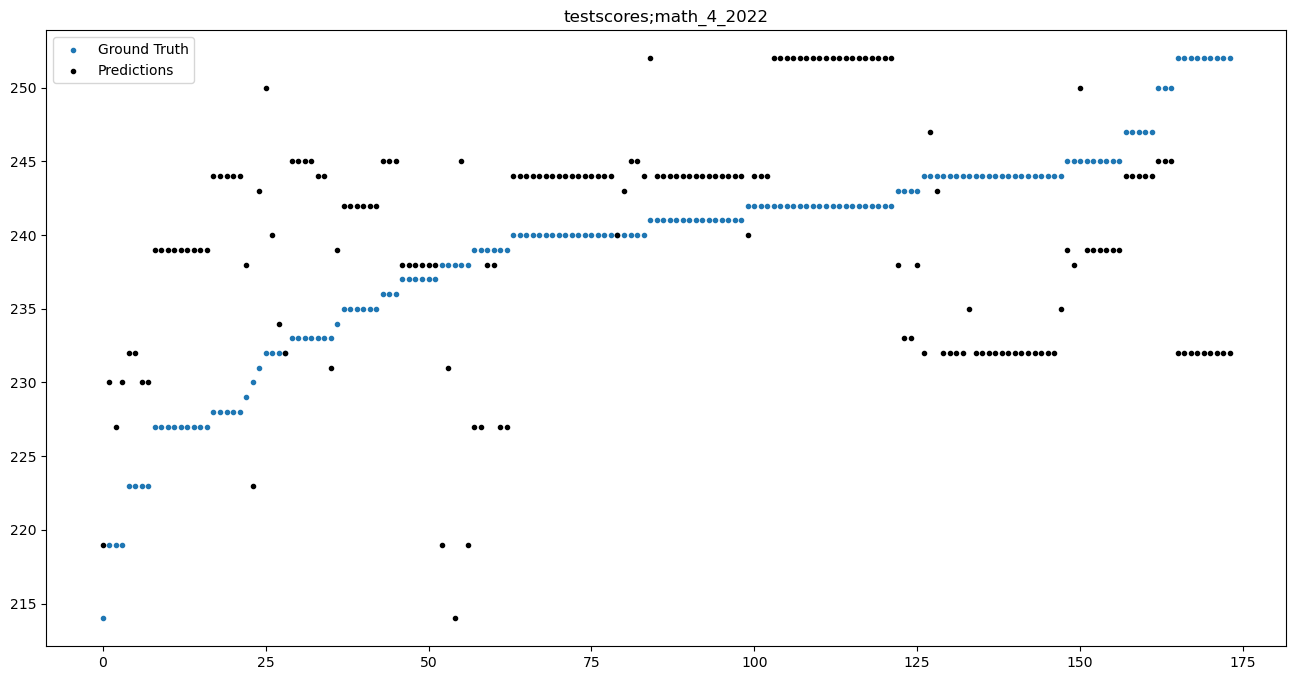

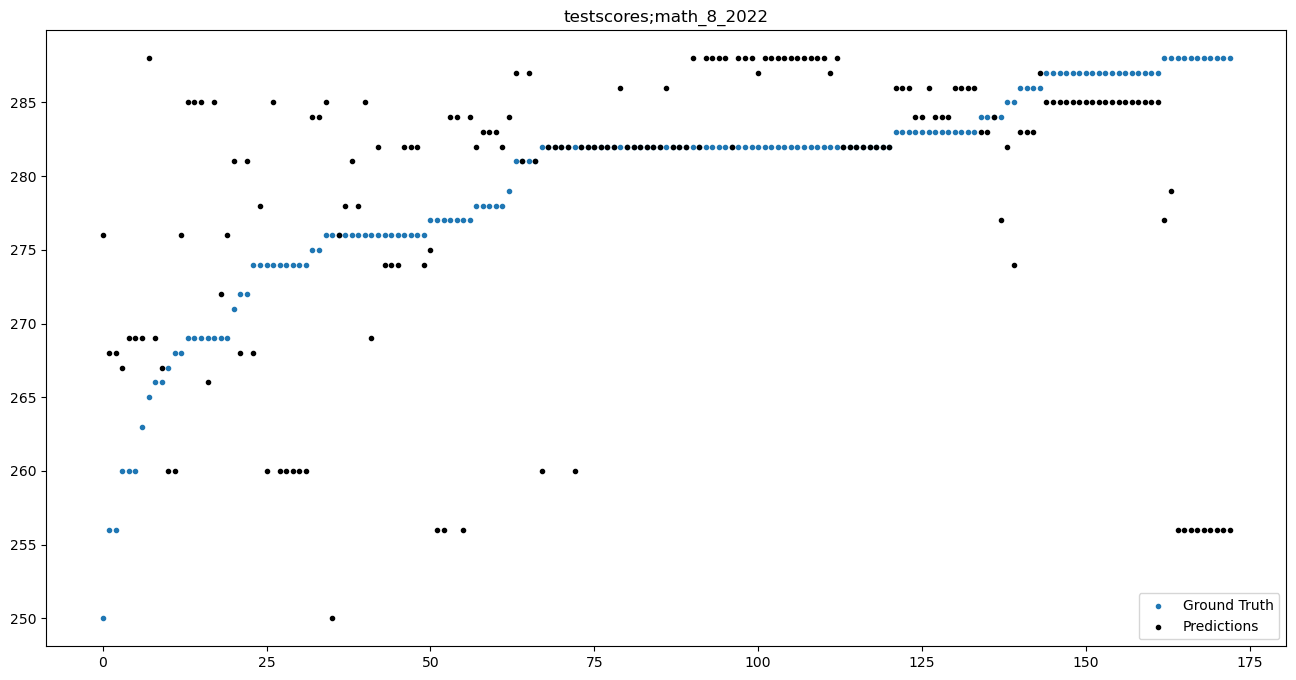

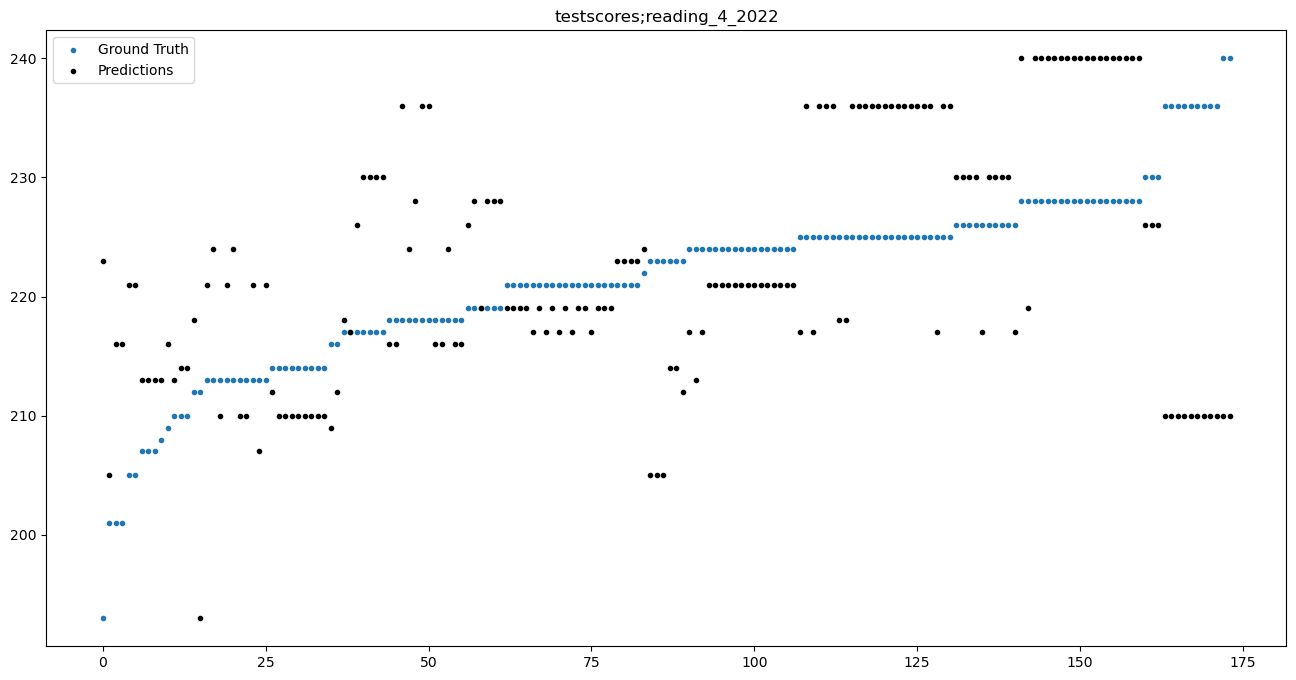

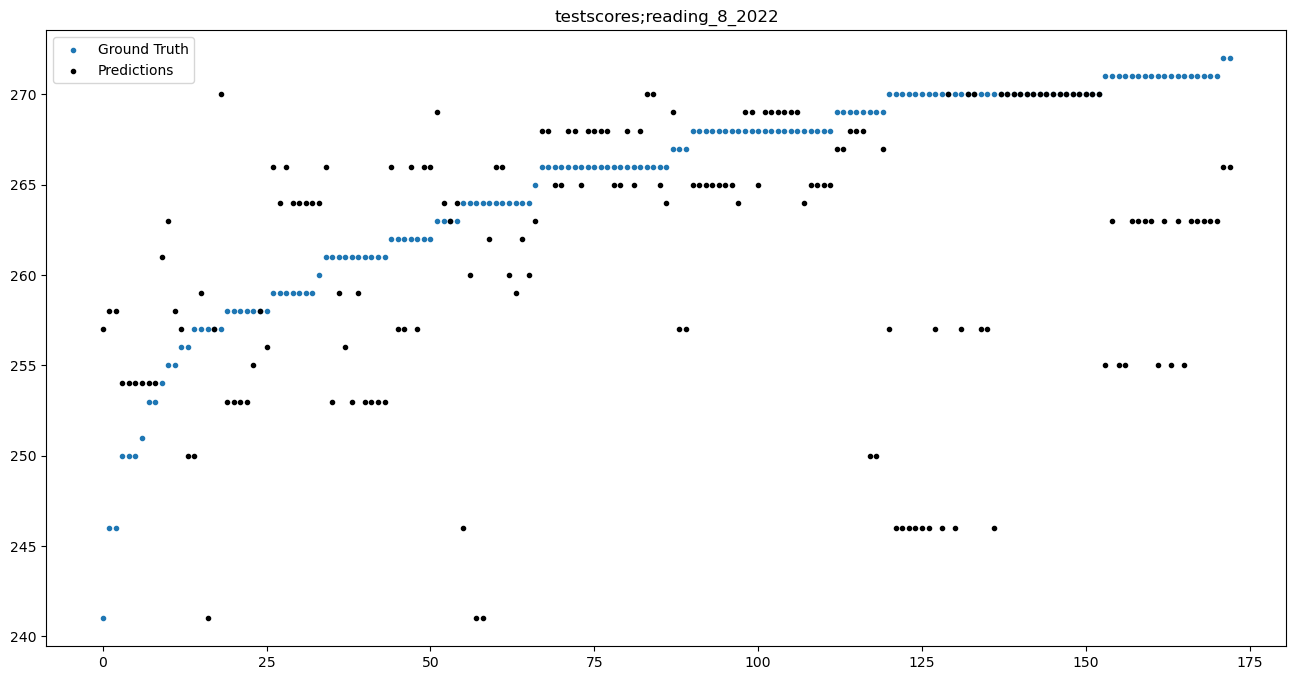

In [16]:
plot_residuals(five_fold_results)

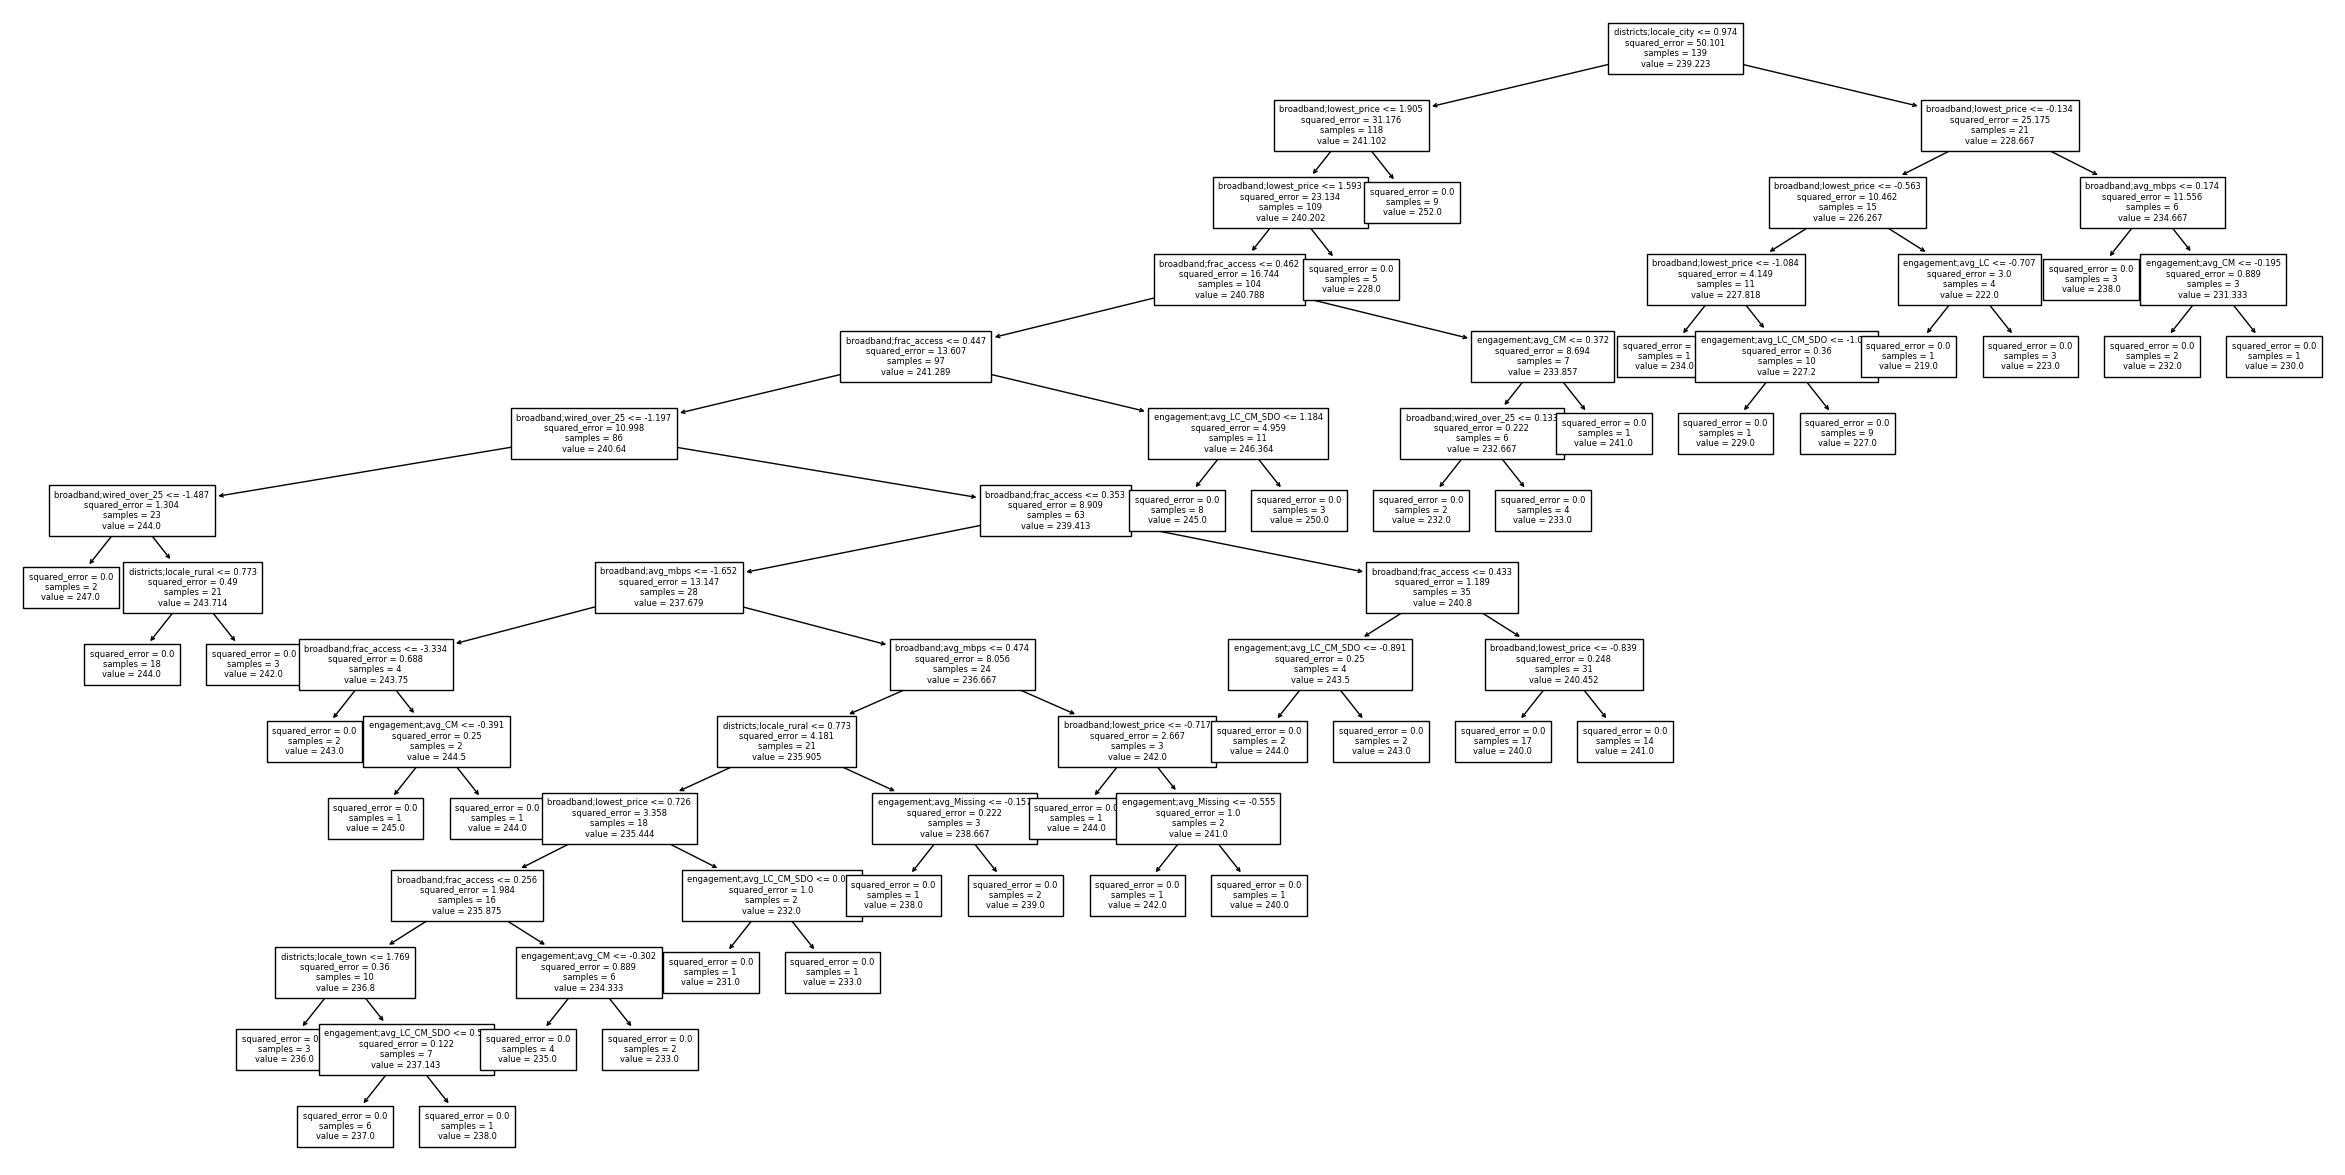

In [17]:
fig, ax = plt.subplots(figsize=(30,15))
plot_tree(five_fold_results[0][0]['estimator'][0]['decisiontreeregressor'], 
          feature_names=['engagement;avg_SDO',
                         'engagement;avg_CM',
                         'engagement;avg_LC', 
                         'engagement;avg_LC_CM_SDO', 
                         'engagement;avg_Missing',
                         'districts;locale_city', 
                         'districts;locale_suburb', 
                         'districts;locale_town',
                         'districts;locale_rural',
                         'broadband;wired_over_25',
                         'broadband;avg_mbps', 
                         'broadband;frac_access', 
                         'broadband;lowest_price'],
          filled=False,
          fontsize=6,
          ax=ax);

<a id='model1b_model'></a>

## Model 1b: Predict Change In 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [18]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


<a id='model1b_results'></a>

### Model 1b Testing Results

[(Back to top)](#models)

In [19]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-1.5665
test_root_mean_squared_error,5.2827


testscores;math_4_delta: 5.2827


,testscores;math_8_delta
test_r2,-0.4491
test_root_mean_squared_error,3.5929


testscores;math_8_delta: 3.5929


,testscores;reading_4_delta
test_r2,-2.6349
test_root_mean_squared_error,4.8857


testscores;reading_4_delta: 4.8857


,testscores;reading_8_delta
test_r2,-1.7753
test_root_mean_squared_error,5.1107


testscores;reading_8_delta: 5.1107


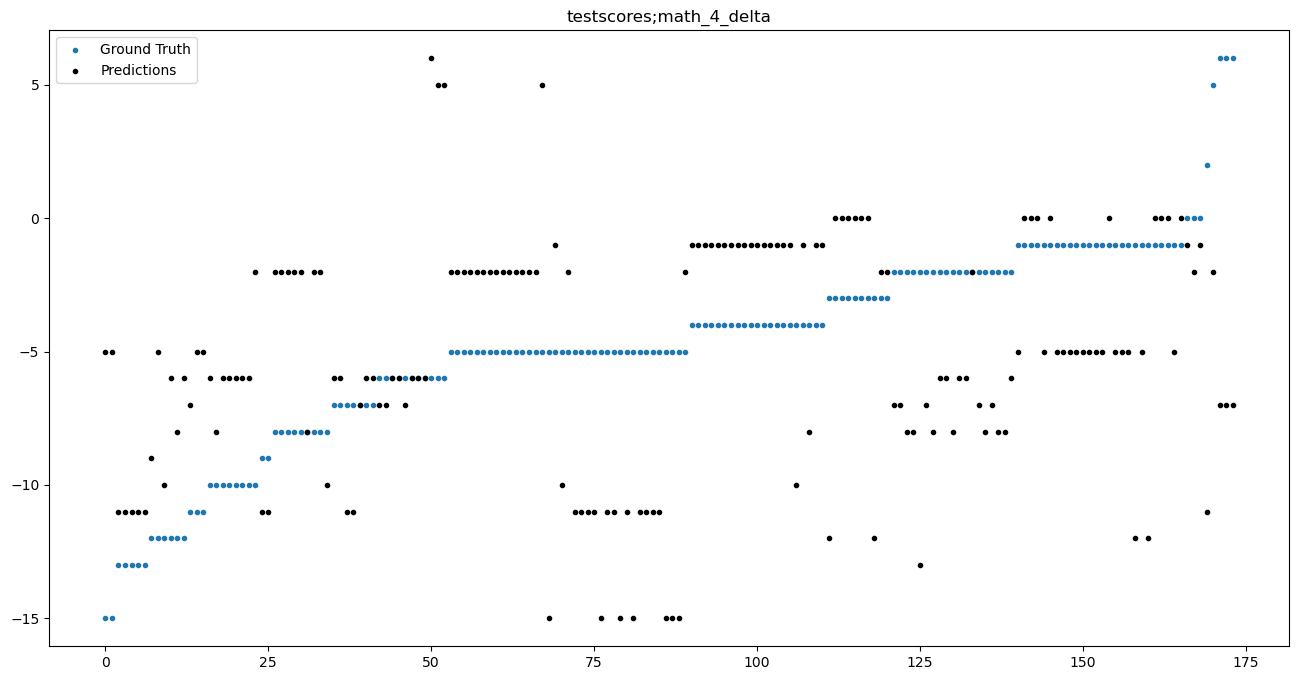

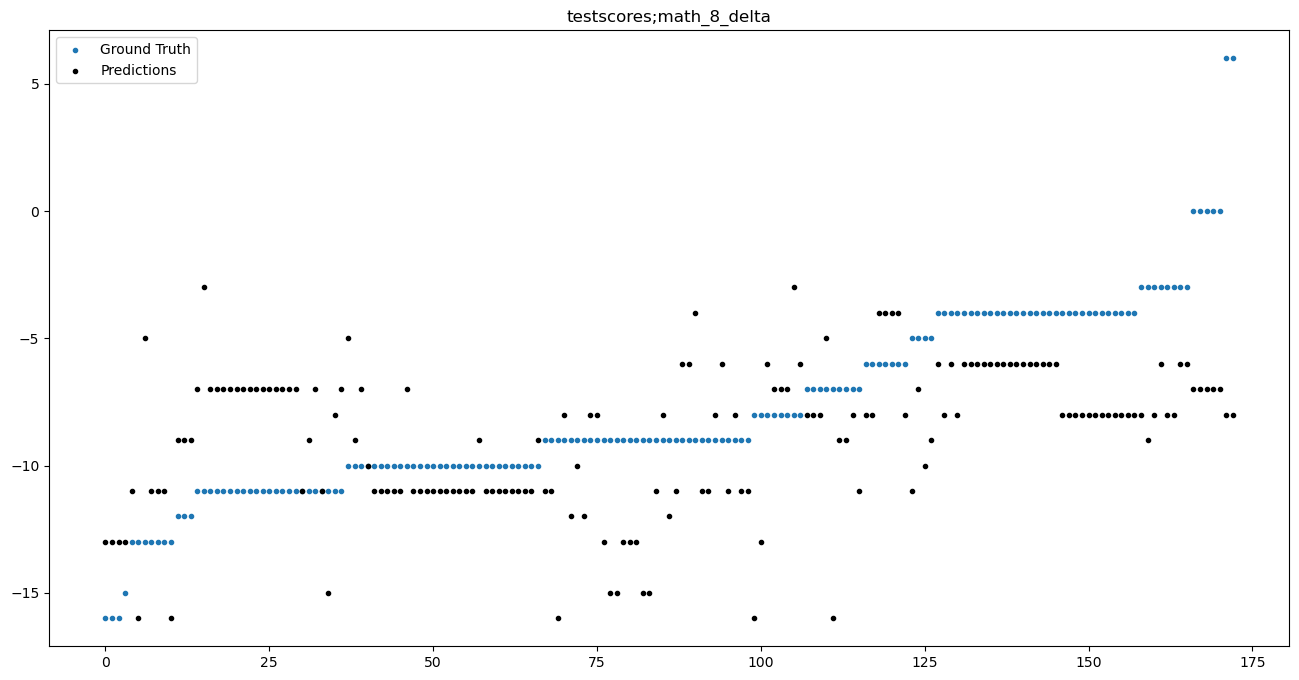

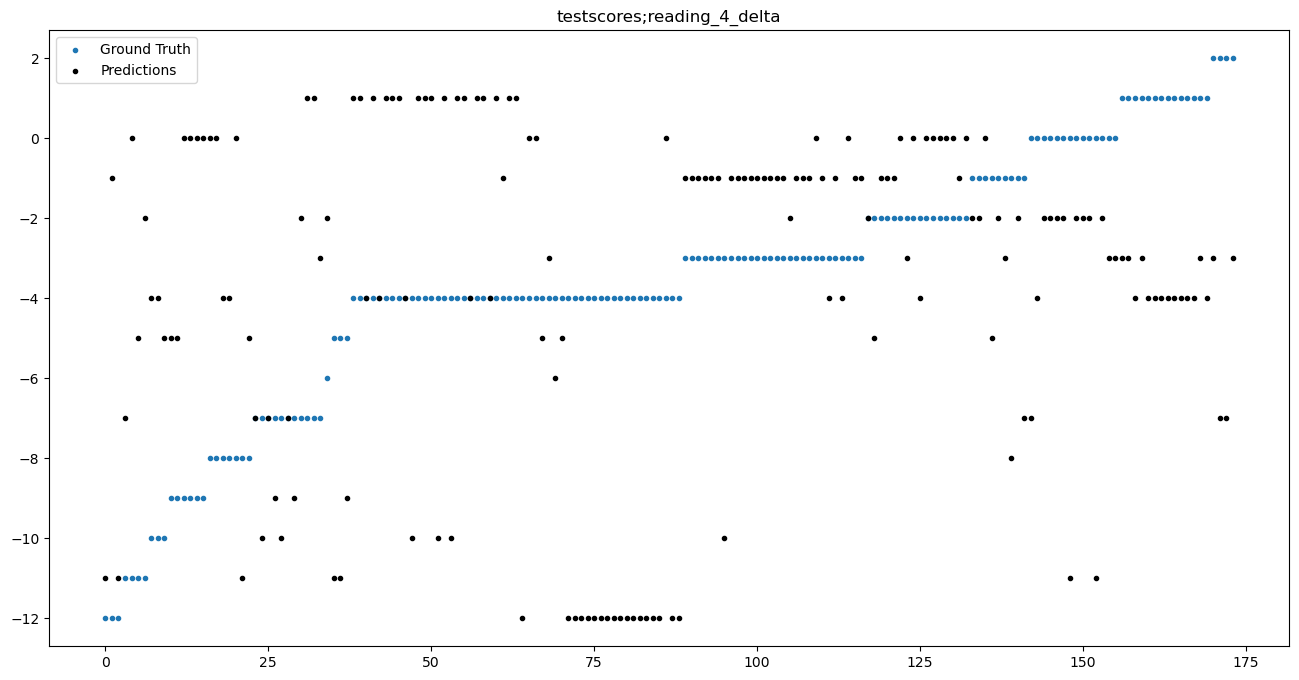

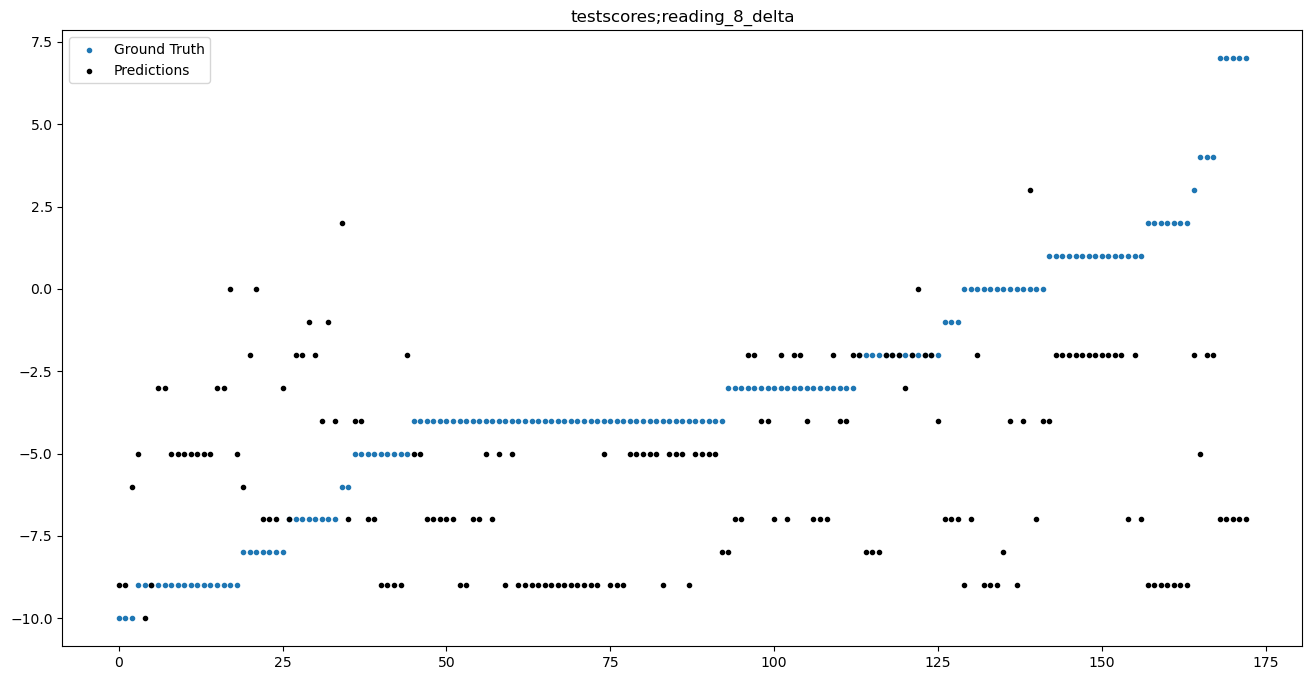

In [20]:
plot_residuals(five_fold_results)

<a id='model1c_model'></a>

## Model 1c: Predict SAT Scores from All Data

[(Back to top)](#models)

In [21]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_2022', 
           'testscores;sat_ebrw_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;sat_math_2022 has 176 samples after filtering
Dataset for testscores;sat_ebrw_2022 has 176 samples after filtering


<a id='model1c_results'></a>

### Model 1c Testing Results

[(Back to top)](#models)

In [22]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_2022
test_r2,-1.8169
test_root_mean_squared_error,50.5052


testscores;sat_math_2022: 50.5052


,testscores;sat_ebrw_2022
test_r2,-2.6005
test_root_mean_squared_error,56.2984


testscores;sat_ebrw_2022: 56.2984


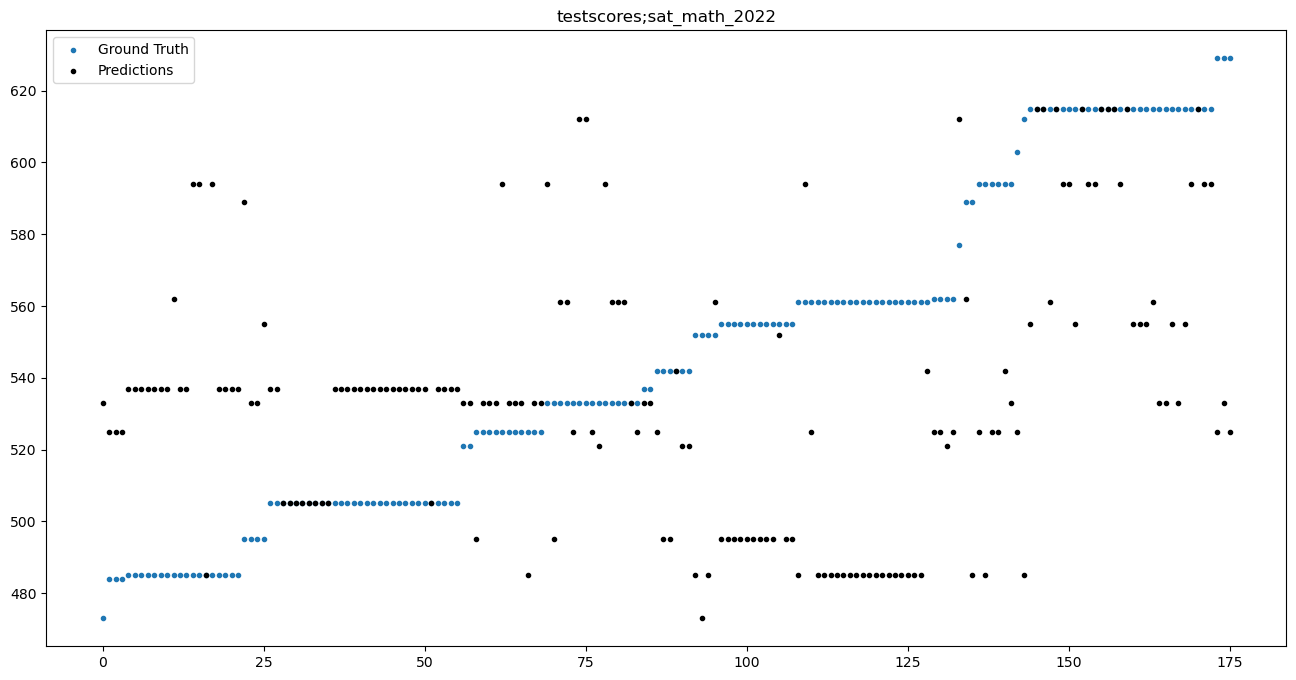

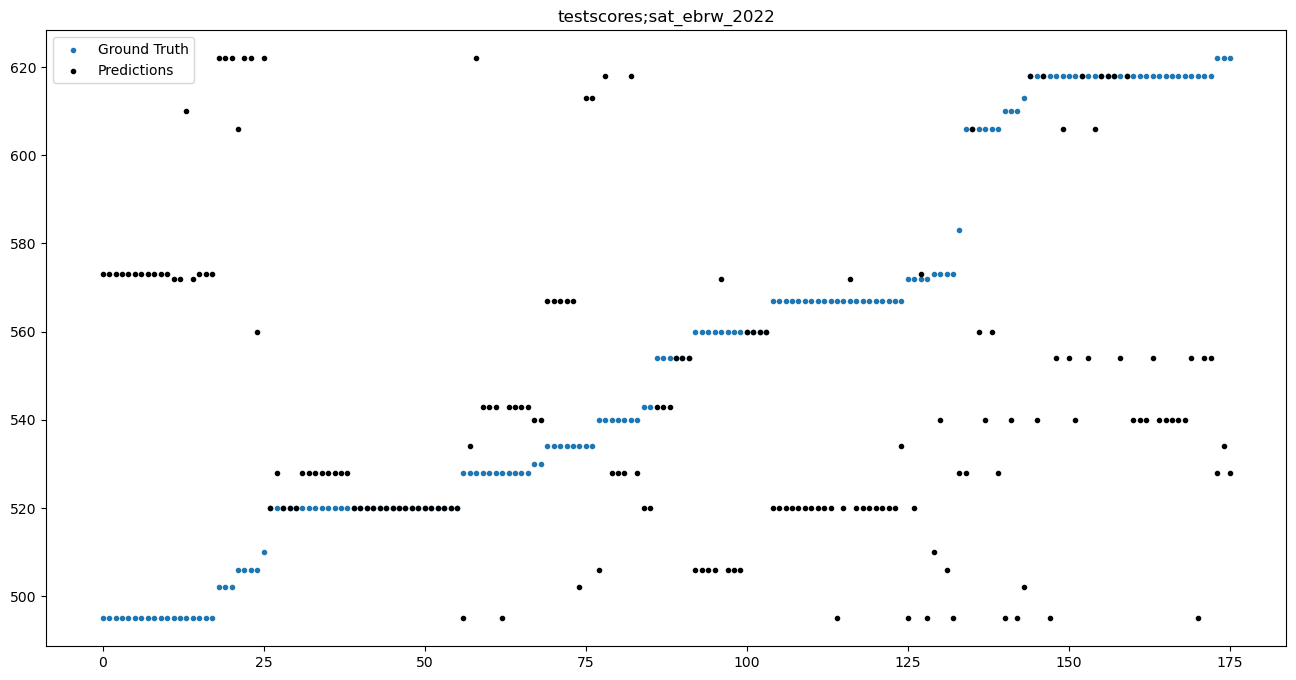

In [23]:
plot_residuals(five_fold_results)

<a id='model1d_model'></a>

## Model 1d: Predict SAT Score Change from All Data

[(Back to top)](#models)

In [24]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


<a id='model1d_results'></a>

### Model 1d Testing Results

[(Back to top)](#models)

In [25]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.8012
test_root_mean_squared_error,15.2029


testscores;sat_math_delta: 15.2029


,testscores;sat_ebrw_delta
test_r2,-0.4680
test_root_mean_squared_error,13.9286


testscores;sat_ebrw_delta: 13.9286


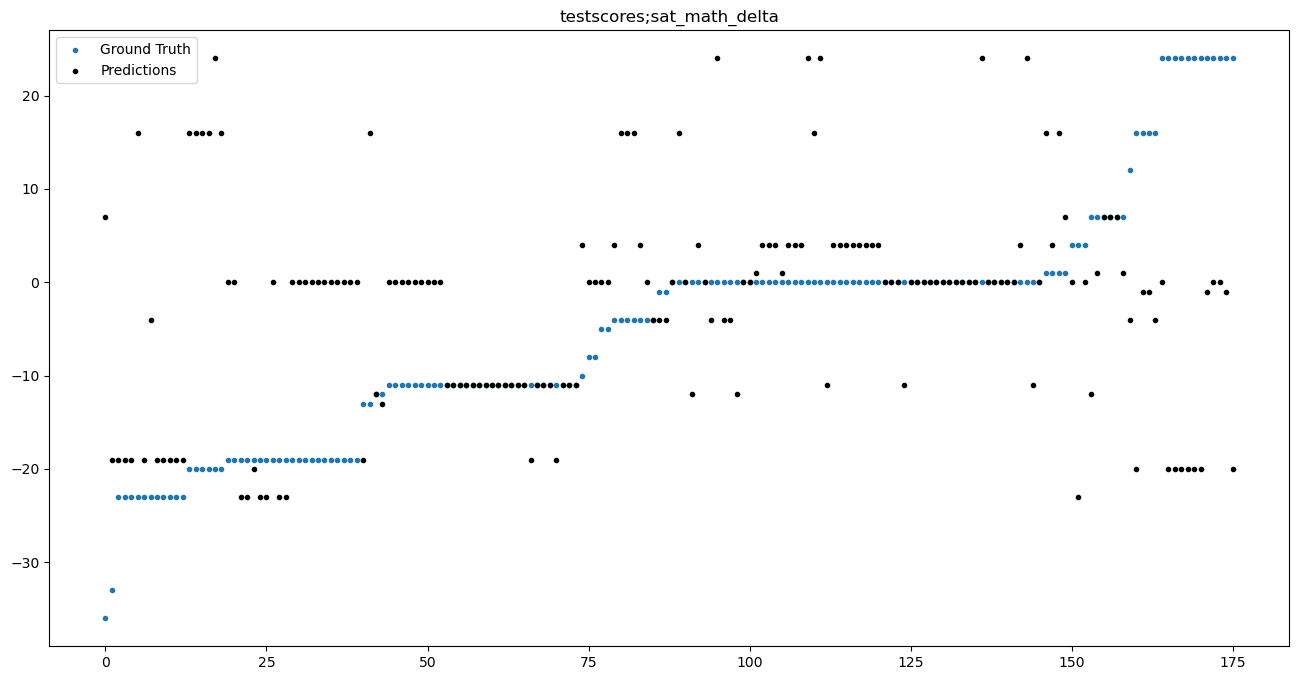

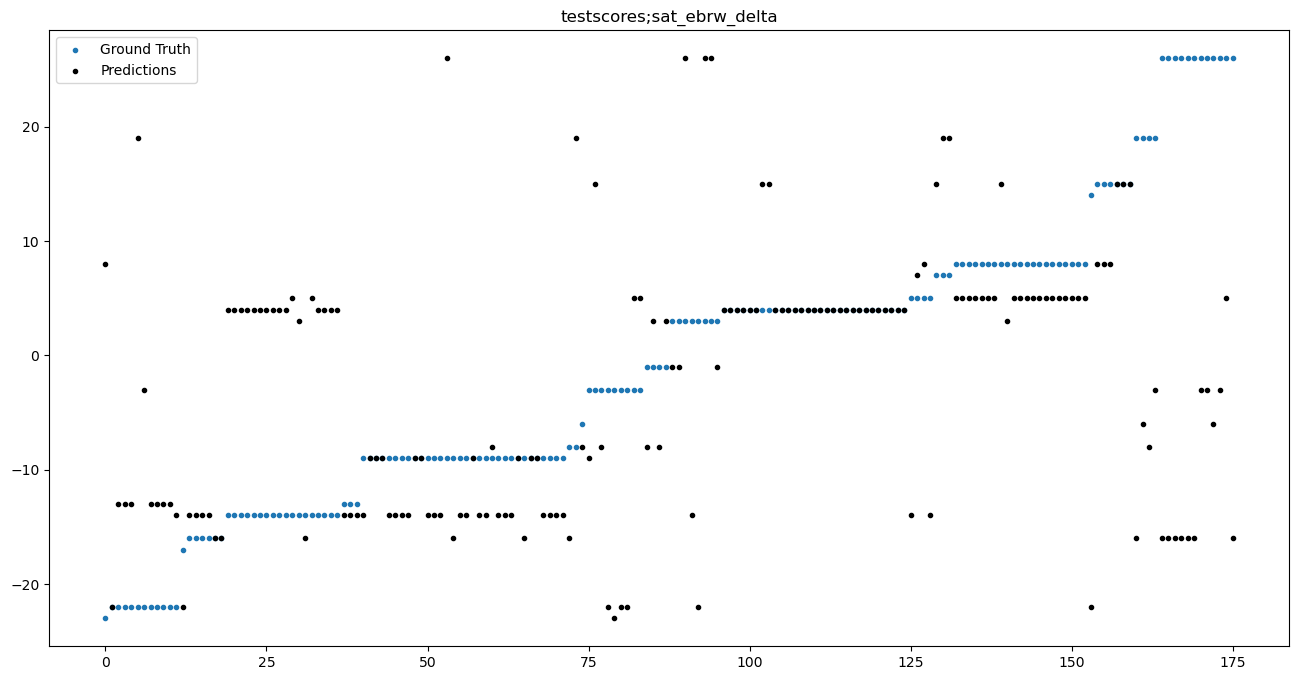

In [26]:
plot_residuals(five_fold_results)

<a id='model2a_model'></a>

## Model 2a: Predict 8th and 4th Grade Test Scores from Locale Type (Best Baseline) Data

[(Back to top)](#models)

In [27]:
FEATURES = ['districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

TARGETS = ['testscores;math_4_2022', 
           'testscores;math_8_2022', 
           'testscores;reading_4_2022', 
           'testscores;reading_8_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;math_4_2022 has 174 samples after filtering
Dataset for testscores;math_8_2022 has 173 samples after filtering
Dataset for testscores;reading_4_2022 has 174 samples after filtering
Dataset for testscores;reading_8_2022 has 173 samples after filtering


<a id='model2a_results'></a>

### Model 2a Testing Results

[(Back to top)](#models)

In [28]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_2022
test_r2,0.3084
test_root_mean_squared_error,5.4202


testscores;math_4_2022: 5.4202


,testscores;math_8_2022
test_r2,0.1305
test_root_mean_squared_error,5.3431


testscores;math_8_2022: 5.3431


,testscores;reading_4_2022
test_r2,-0.0484
test_root_mean_squared_error,6.7133


testscores;reading_4_2022: 6.7133


,testscores;reading_8_2022
test_r2,-0.3671
test_root_mean_squared_error,5.3784


testscores;reading_8_2022: 5.3784


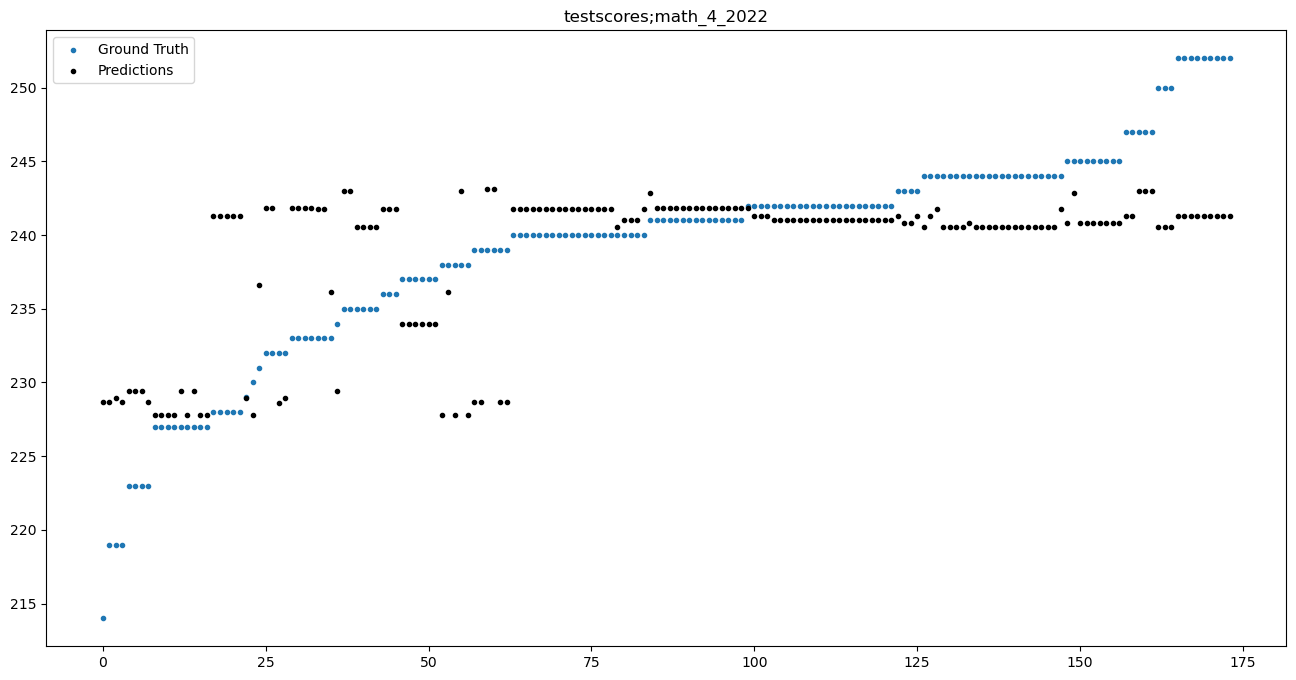

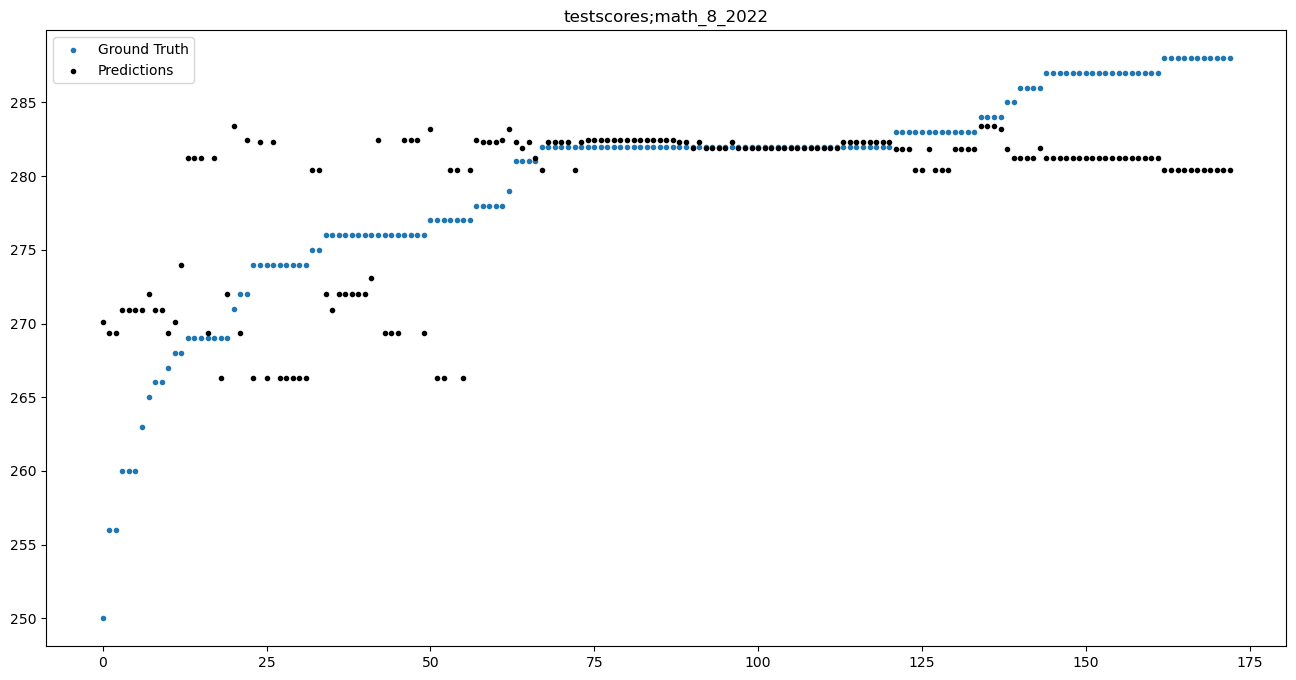

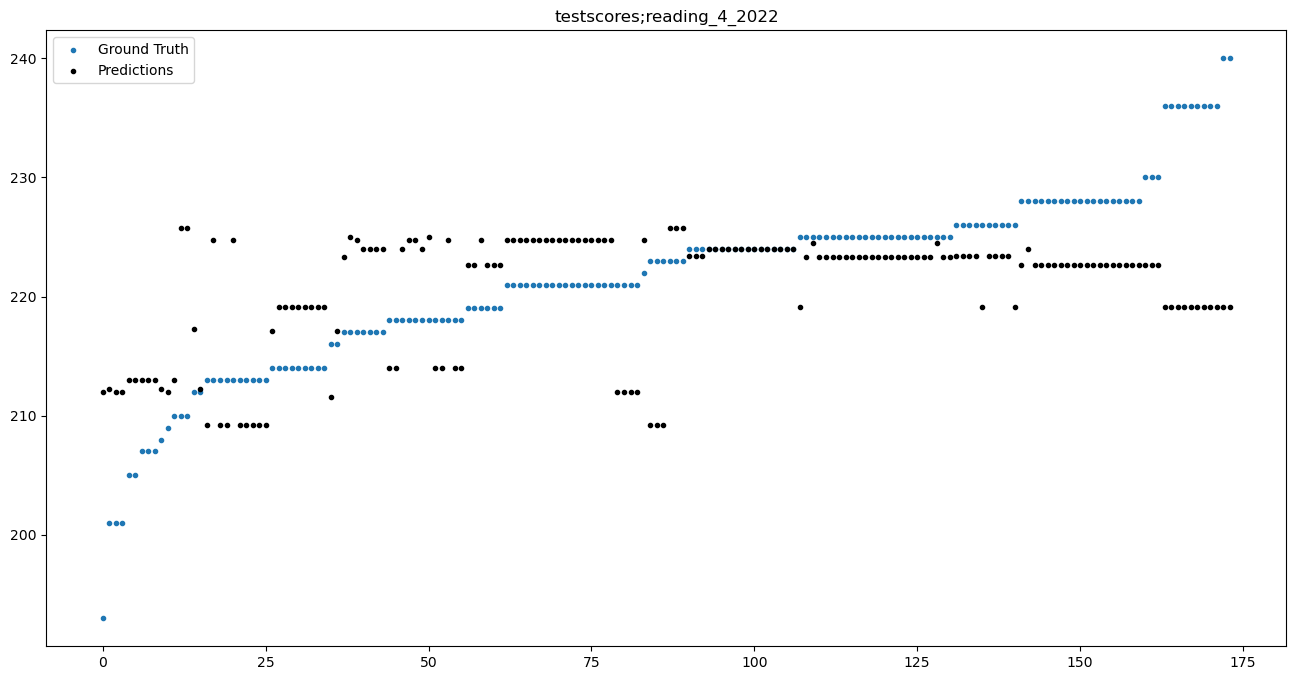

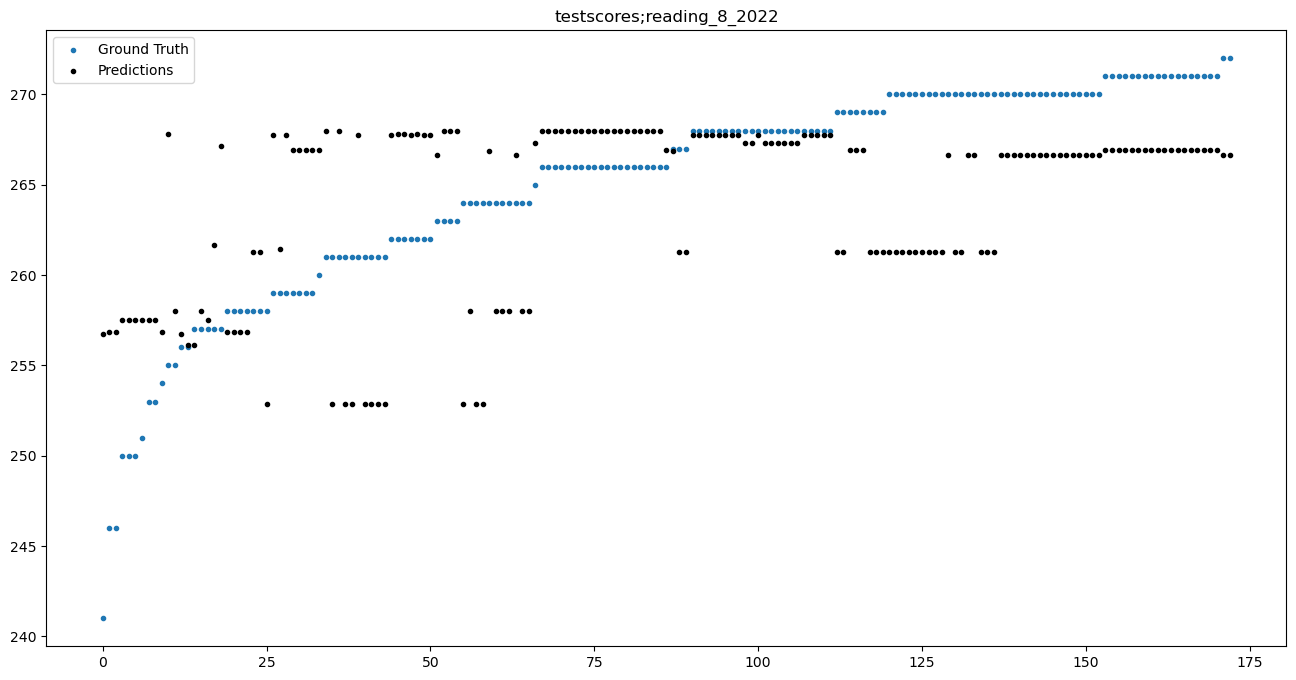

In [29]:
plot_residuals(five_fold_results)

<a id='model2b_model'></a>

## Model 2b: Predict Change In 8th and 4th Grade Test Scores from Engagement and Locale (Best Baseline) Data

[(Back to top)](#models)

In [30]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


<a id='model2b_results'></a>

### Model 2b Testing Results

[(Back to top)](#models)

In [31]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-1.0878
test_root_mean_squared_error,4.9509


testscores;math_4_delta: 4.9509


,testscores;math_8_delta
test_r2,-2.3901
test_root_mean_squared_error,5.3712


testscores;math_8_delta: 5.3712


,testscores;reading_4_delta
test_r2,-1.6642
test_root_mean_squared_error,4.6536


testscores;reading_4_delta: 4.6536


,testscores;reading_8_delta
test_r2,-2.0629
test_root_mean_squared_error,5.2574


testscores;reading_8_delta: 5.2574


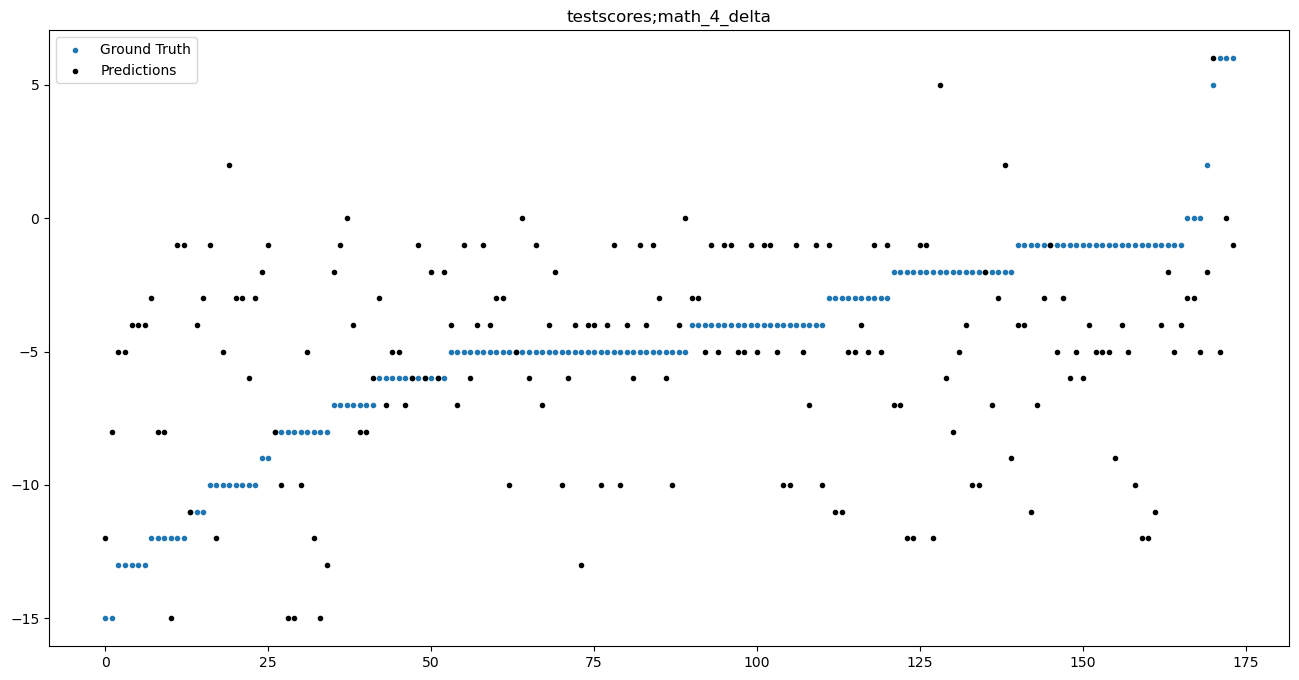

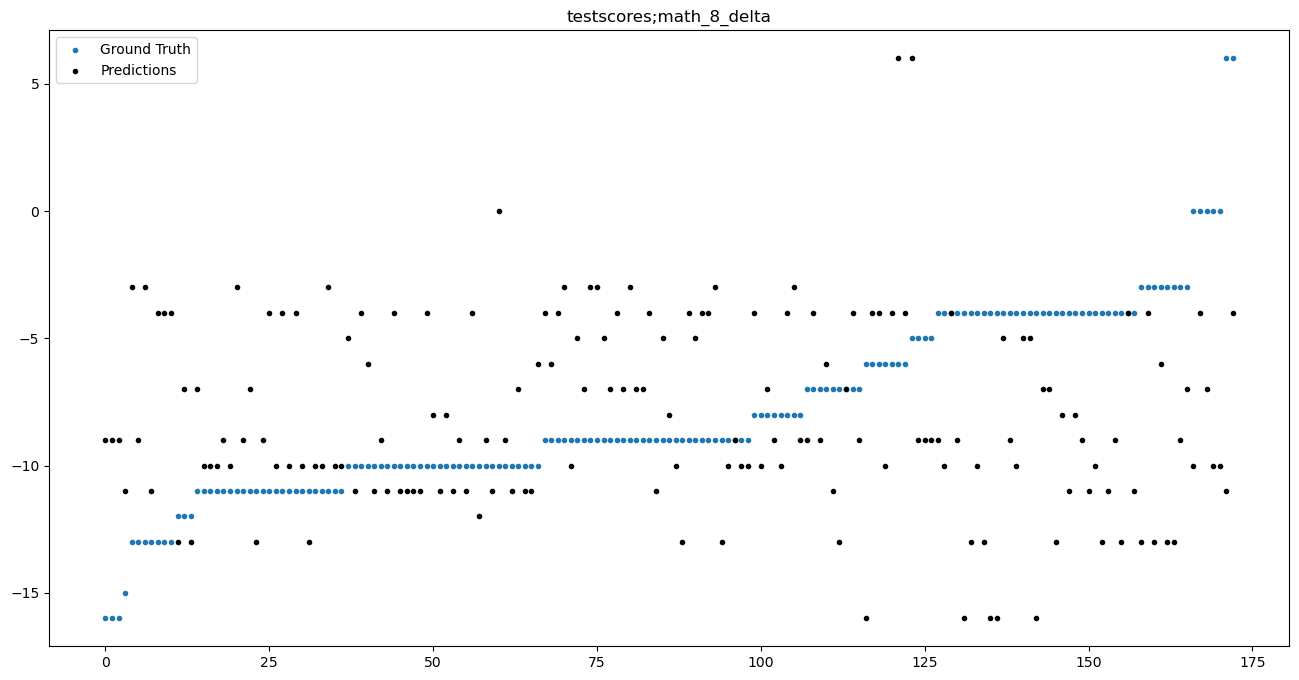

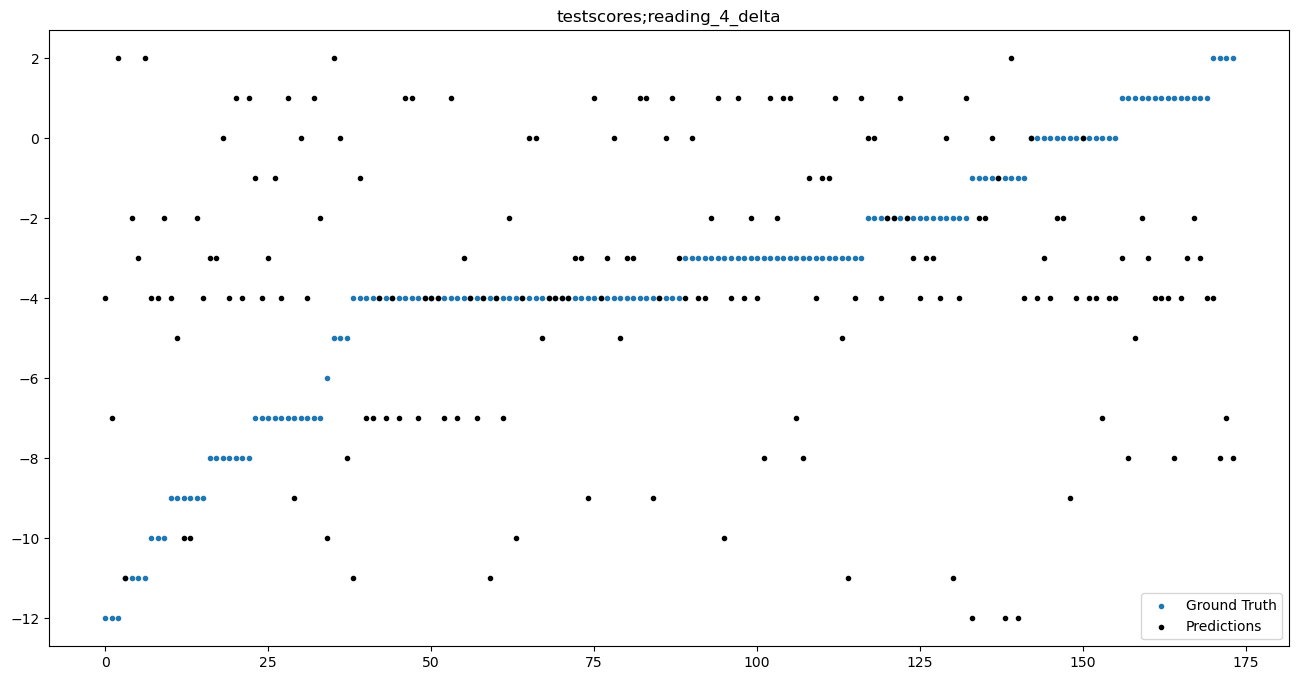

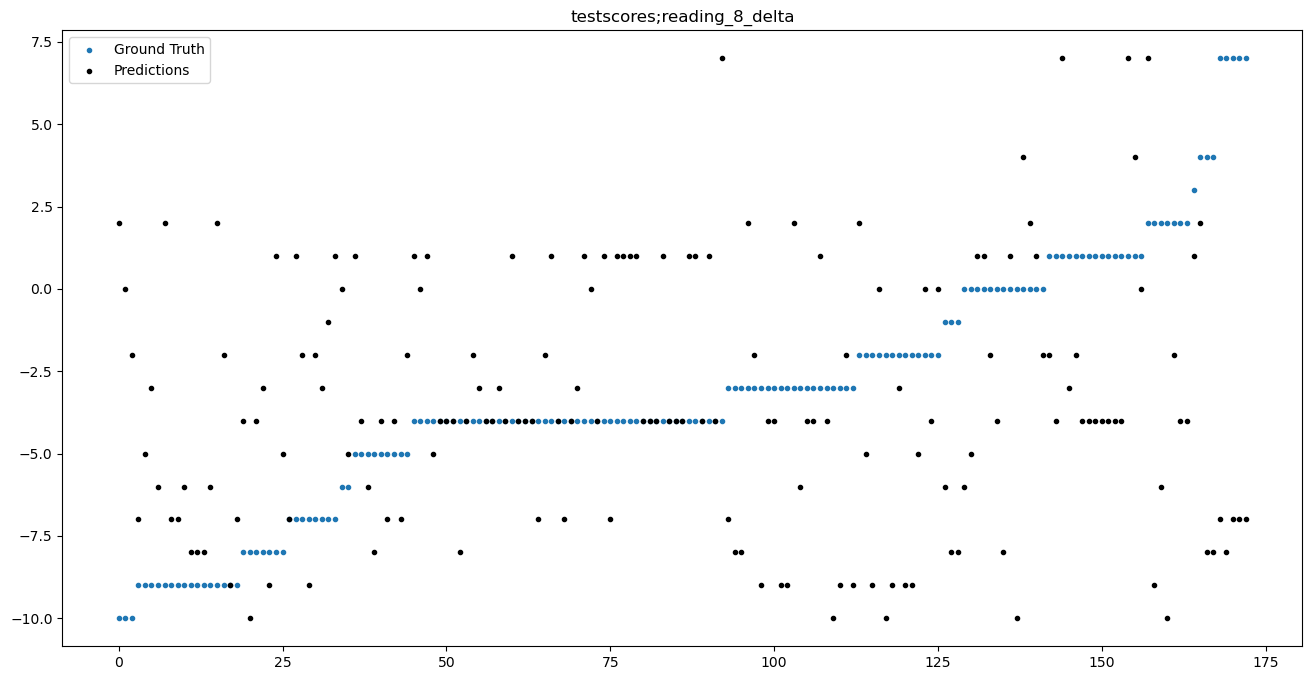

In [32]:
plot_residuals(five_fold_results)

<a id='model2c_model'></a>

## Model 2c: Predict SAT Scores from Engagement (Best Baseline) Data

[(Back to top)](#models)

In [33]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing']

TARGETS = ['testscores;sat_math_2022', 
           'testscores;sat_ebrw_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;sat_math_2022 has 176 samples after filtering
Dataset for testscores;sat_ebrw_2022 has 176 samples after filtering


<a id='model2c_results'></a>

### Model 2c Testing Results

[(Back to top)](#models)

In [34]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_2022
test_r2,-2.4203
test_root_mean_squared_error,57.5920


testscores;sat_math_2022: 57.592


,testscores;sat_ebrw_2022
test_r2,-2.0808
test_root_mean_squared_error,52.5340


testscores;sat_ebrw_2022: 52.534


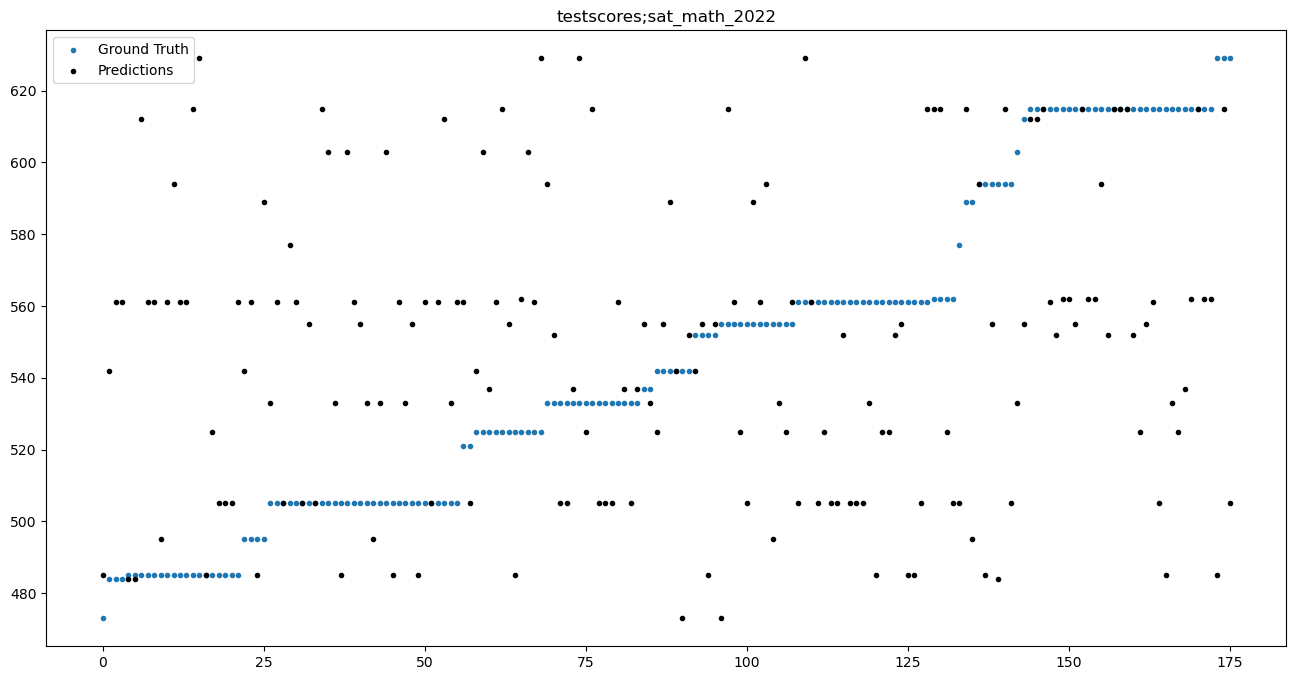

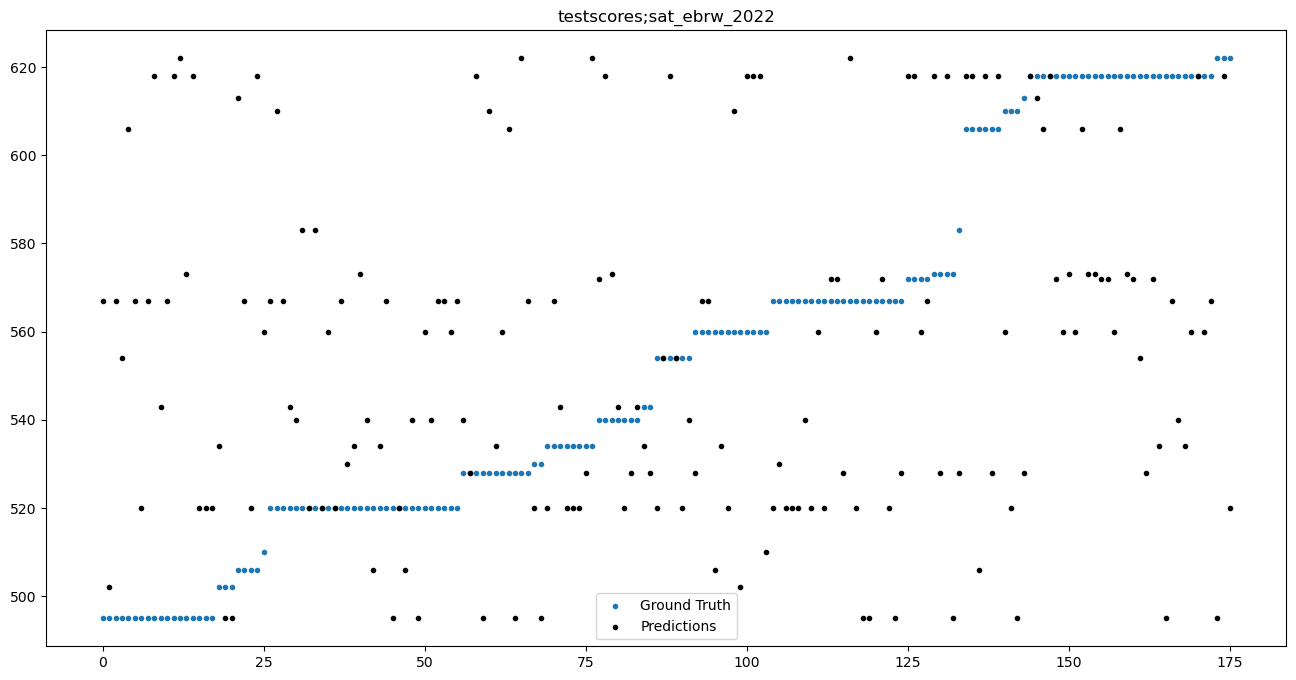

In [35]:
plot_residuals(five_fold_results)

<a id='model2d_model'></a>

## Model 2d: Predict SAT Score Change from Broadband (Best Baseline) Data

[(Back to top)](#models)

In [37]:
FEATURES = ['broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(),
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


<a id='model2d_results'></a>

### Model 2d Testing Results

[(Back to top)](#models)

In [38]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.8355
test_root_mean_squared_error,14.2235


testscores;sat_math_delta: 14.2235


,testscores;sat_ebrw_delta
test_r2,-0.4144
test_root_mean_squared_error,13.1131


testscores;sat_ebrw_delta: 13.1131


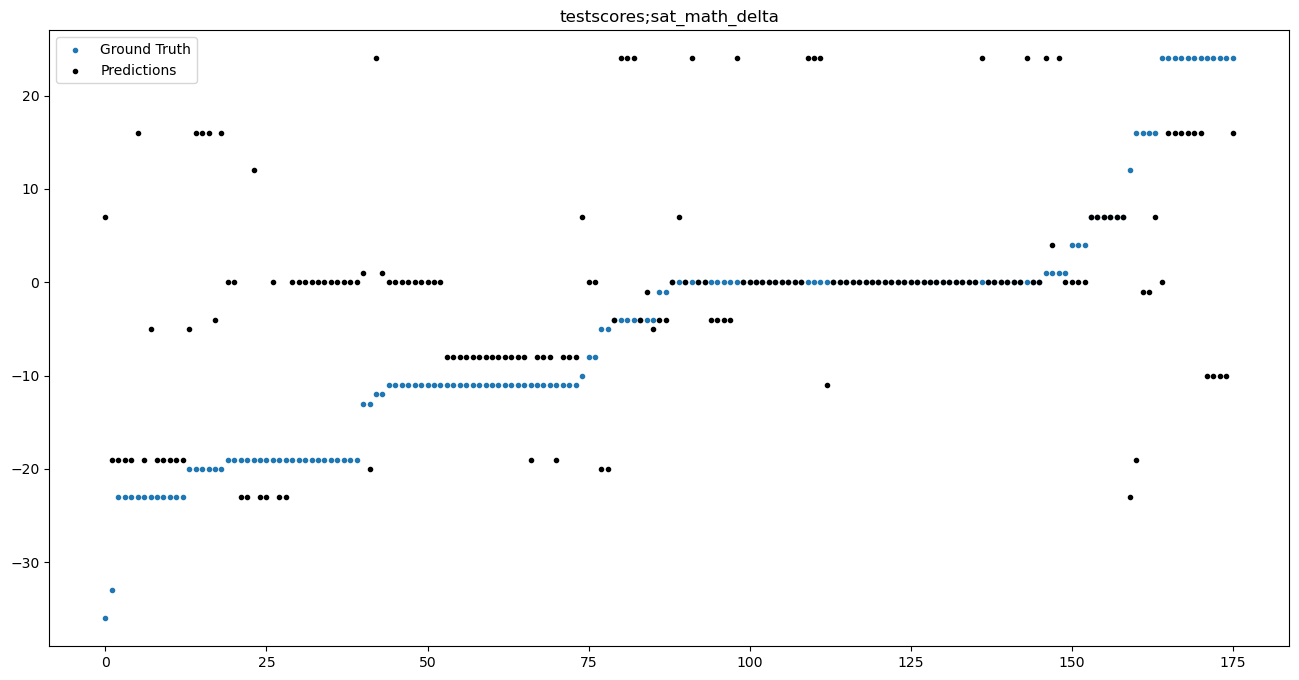

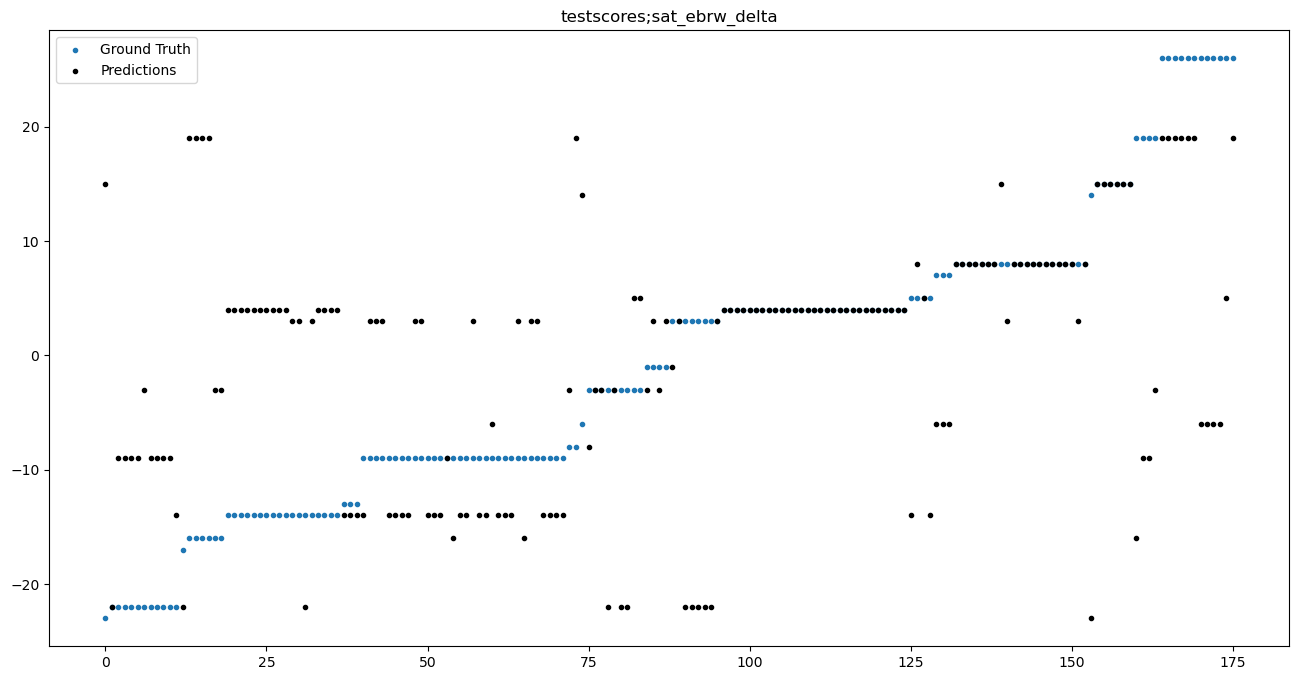

In [39]:
plot_residuals(five_fold_results)

-------------